# **Comparativa y Selección de modelos de clasificación: SVM, Random Forest y Árbol de Decisión aplicados al dataset Fashion-MNIST**

A continuación  se presenta el análisis comparativo entre tres modelos de clasificación supervisados Random Forest (Bosque Aleatorio), SVM (Support Vector Machine) y Árbol de Decisión (Decision Tree) aplicados sobre el dataset de Fashion-MNIST. Se evalúan métricas de rendimiento, costo computacional, interpretabilidad y adecuación práctica, con el fin de determinar el modelo más conveniente.

 Antes de empezar, realizaremos una breve descripción del dominio del dataset implementado, correspondiente al Fashion-MNIST (en el este link se puede hallar mayor detalle: https://www.kaggle.com/datasets/zalando-research/fashionmnist).


**Contexto**

 Fashion-MNIST es un conjunto de datos creado por Zalando, compuesto por 60 000 imágenes de entrenamiento y 10 000 de prueba, cada una en escala de grises de 28×28 píxeles. Representa 10 clases de prendas de vestir y fue diseñado como un reemplazo directo del dataset MNIST de dígitos escritos a mano, manteniendo el mismo formato y estructura. Su objetivo es evaluar y comparar algoritmos de aprendizaje automático bajo condiciones más realistas. A diferencia del MNIST original (centrado en números manuscritos), Fashion-MNIST introduce mayor complejidad visual y desafío de clasificación.


**Contenido**

Cada imagen tiene 28 píxeles de alto y 28 de ancho, para un total de 784 píxeles. Cada píxel tiene un solo valor de píxel asociado, lo que indica la claridad u oscuridad de ese píxel; los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas.

La primera columna consta de las etiquetas de clase y representa la prenda de vestir. El resto de las columnas contienen los valores de píxeles de la imagen asociada. Cada fila es una imagen separada con sus 784 píxeles.

**Etiquetas**

Cada ejemplo de entrenamiento y prueba se asigna a una de las siguientes etiquetas:

* 0 camiseta / top
* 1 pantalón
* 2 suéter
* 3 vestido
* 4 abrigo
* 5 sandalia
* 6 camiseta
* 7 zapatilla
* 8 bolsa
* 9 bota de tobillo

A continuación, **Oscar Mauricio Parra Folleco, Jaime Alberto Sierra Sierra y Juan Miguel Velandia Garcia** integrantes del **grupo 3** de la asignatura de Aprendizaje Automático en la Maestría de Inteligencia Atificial desarrollarán:

1.   Importe de las librerias necesarias y cargue del dataset Fashion MNIST
2.   El análisis exploratorio de datos y el pre procesamiento
3.   La implementación detallada de los 3 modelos (3.1  Modelo Random Forest, 3.2  Modelo Support Vector Machine, 3.3  Modelo Arbol de Decisión)
4.   La comparación del rendimiento de los modelos
5.   Las conclusiones técnicas, hallazgos clave, limitaciones y futuras mejoras.

Para cada una de las secciones mencionadas se agrega una celda de texto inicial con una descripción breve de lo incluido y una celda de texto final donde se describe lo encontrado. **Finalmente se agrega una celda con las conclusiones técnicas generales del ejercicio realizado**






# **1. Importe de las librerias necesarias**
Se incluye además de las librerias pandas, numpy y matplotlib, la de keras con el ánimo de poder cargar y consumir el conjunto de datos MNIST.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as kr

# **1. Lectura del Dataset (Datos Recolectados Fashion-MNIST)**
Descarga y carga del conjunto de datos Fashion MNIST

In [ ]:
(X_train, y_train), (X_test, y_test) = kr.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **2. Análisis Exploratorio y Pre-Procesamiento de datos  de Datos (EDA)**

*   Inspección previa del conjunto de datos antes de su preparación y entrenamiento
*   Preparación de los datos para mostrar una imagen de ejemplo por cada tipo de prenda del conjunto de datos
*  Análisis de la importancia de las variables (píxeles)
* Confirmación de datos completos, sin nulos ni duplicados
* Verificación del balance de clases (~6 000 imágenes por categoría).
* Visualización de ejemplos aleatorios para validar el dominio visual.
* Análisis de la distribución de intensidades de píxeles (0–255).
* Normalización del dataset y cofirmación de correcta estandarización,  codificación
* Visualizaciones de relaciones con la matriz de correlación y visualización boxplots
* Análisis de estadísticos descriptivos (histogramas, media, quartiles, etc.)

In [ ]:

# Se asume que X_train es un arreglo de numpy contenido en el entrenamiento de datos
# Convierte el arreglo numpy a pandas DataFrame
df_train_pd = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))

# Crea nombre de columas por pixeles
pixel_cols = [f'pixel{i+1}' for i in range(df_train_pd.shape[1])]

# Asigna nombres de columnas al DataFrame
df_train_pd.columns = pixel_cols

# Inserta la columna denominada etiqueta (asume que y_train contiene las etiquetas)
df_train_pd.insert(0, 'label', y_train)

display(df_train_pd.head())

# En cuanto a codificación, para este dataset solo se observan variables numericas y solo una categórica, la cual ya se encuentra codificada para cada una de las 10 clases (entre 0 y 9)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Para inspeccionar el dataset se visualizará una única prenda por clase
df_unique = df_train_pd.drop_duplicates("label", keep="first").sort_values("label")
X_u = df_unique.iloc[:,1:].values
y_u = df_unique.iloc[:,0].values

In [ ]:
# Validación de la forma del conjunto
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Validación del arreglo y tipo de datos en y_test
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Validación del arreglo y tipo de datos de la variable y_u
y_u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

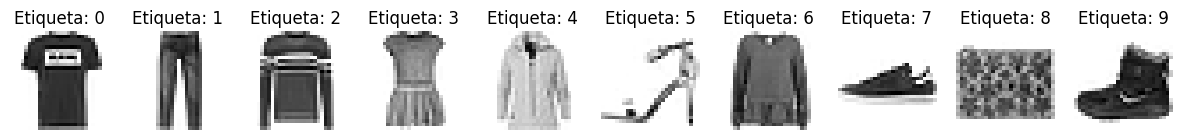

In [ ]:
# Visualización de una prenda por clase para entendimiento del conjunto de datos
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for ax, image, label in zip(axes, X_u, y_u):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Etiqueta: %i' % label)

In [ ]:
# Importe de las librerias numpy, pandas y keras
import numpy as np
import pandas as pd
import keras as kr


# Carga el dataset Fashion MNIST
(X_train, y_train), (X_test, y_test) = kr.datasets.fashion_mnist.load_data()


# Verificar valores nulos en el conjunto de entrenamiento
print("Valores nulos en X_train:", np.isnan(X_train).sum())
print("Valores nulos en y_train:", np.isnan(y_train).sum())

# Verificar duplicados (considerando las imágenes aplanadas)
print("Número de filas duplicadas en X_train:", pd.DataFrame(X_train.reshape(X_train.shape[0], -1)).duplicated().sum())

#Inspección del rango de pixeles despues de la carga con Keras
print("\nVerificando el rango de valores de los píxeles en X_train después de cargar con Keras (rango 0-255):")
print(f"Mínimo valor de píxel en X_train: {X_train.min()}")
print(f"Máximo valor de píxel en X_train: {X_train.max()}")

# --- Normalización de Píxeles a 0-1 ---
# Pixeles normalizados entre 0-1
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

print("\nRango de valores de píxeles después de la normalización (rango 0-1):")
print(f"Mínimo valor de píxel en X_train_normalized: {X_train_normalized.min()}")
print(f"Máximo valor de píxel en X_train_normalized: {X_train_normalized.max()}")
print(f"Mínimo valor de píxel en X_test_normalized: {X_test_normalized.min()}")
print(f"Máximo valor de píxel en X_test_normalized: {X_test_normalized.max()}")


#Inspección del tipo de datos y del rango de valores de los pixeles en el conjunto de entrenamiento
print("\nData type of X_train:", X_train.dtype)
print("Min pixel value in X_train:", X_train.min())
print("Max pixel value in X_train:", X_train.max())

#Inspección del tipo de datos y del rango de valores de los pixeles en el conjunto de prueba
print("Data type of X_test:", X_test.dtype)
print("Min pixel value in X_test:", X_test.min())
print("Max pixel value in X_test:", X_test.max())

# Inspección de balance de las clases
print("\nDistribución de clases en y_train:")
unique_classes, class_counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Clase {cls}: {count} ejemplos")

# Confirmación de la salud del dataset mediente media y desviación estandar.
print("\nConfirmando la media y desviación estándar de los datos de entrenamiento normalizados:")
mean_train = np.mean(X_train_normalized)
std_train = np.std(X_train_normalized)
print(f"Media de X_train_normalized: {mean_train}")
print(f"Desviación estándar de X_train_normalized: {std_train}")

Valores nulos en X_train: 0
Valores nulos en y_train: 0
Número de filas duplicadas en X_train: 0

Verificando el rango de valores de los píxeles en X_train después de cargar con Keras (rango 0-255):
Mínimo valor de píxel en X_train: 0
Máximo valor de píxel en X_train: 255

Rango de valores de píxeles después de la normalización (rango 0-1):
Mínimo valor de píxel en X_train_normalized: 0.0
Máximo valor de píxel en X_train_normalized: 1.0
Mínimo valor de píxel en X_test_normalized: 0.0
Máximo valor de píxel en X_test_normalized: 1.0

Data type of X_train: uint8
Min pixel value in X_train: 0
Max pixel value in X_train: 255
Data type of X_test: uint8
Min pixel value in X_test: 0
Max pixel value in X_test: 255

Distribución de clases en y_train:
Clase 0: 6000 ejemplos
Clase 1: 6000 ejemplos
Clase 2: 6000 ejemplos
Clase 3: 6000 ejemplos
Clase 4: 6000 ejemplos
Clase 5: 6000 ejemplos
Clase 6: 6000 ejemplos
Clase 7: 6000 ejemplos
Clase 8: 6000 ejemplos
Clase 9: 6000 ejemplos

Confirmando la med

--- Análisis Descriptivo de las Etiquetas de Clase ---

Conteo de ejemplos por clase:


,count
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000
9,6000


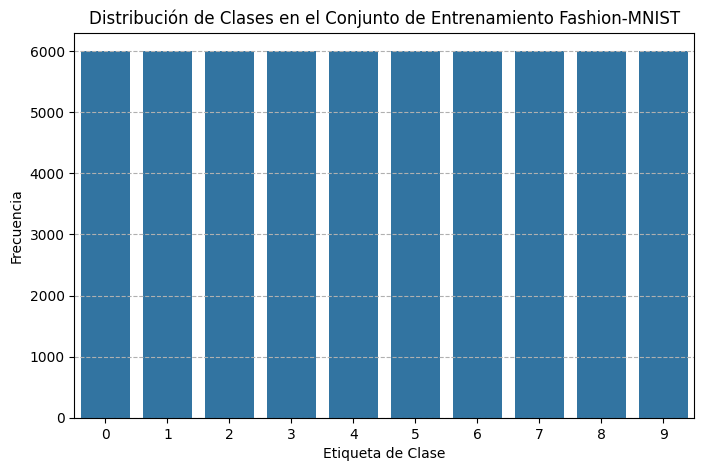


--- Análisis Descriptivo de los Valores de Píxeles ---

Estadísticas descriptivas para los valores de píxeles (mostrando un subconjunto para brevedad):


,0,1,2,3,4,5,6,7,8,9
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000



Estadísticas descriptivas para las etiquetas de clase:


,0
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


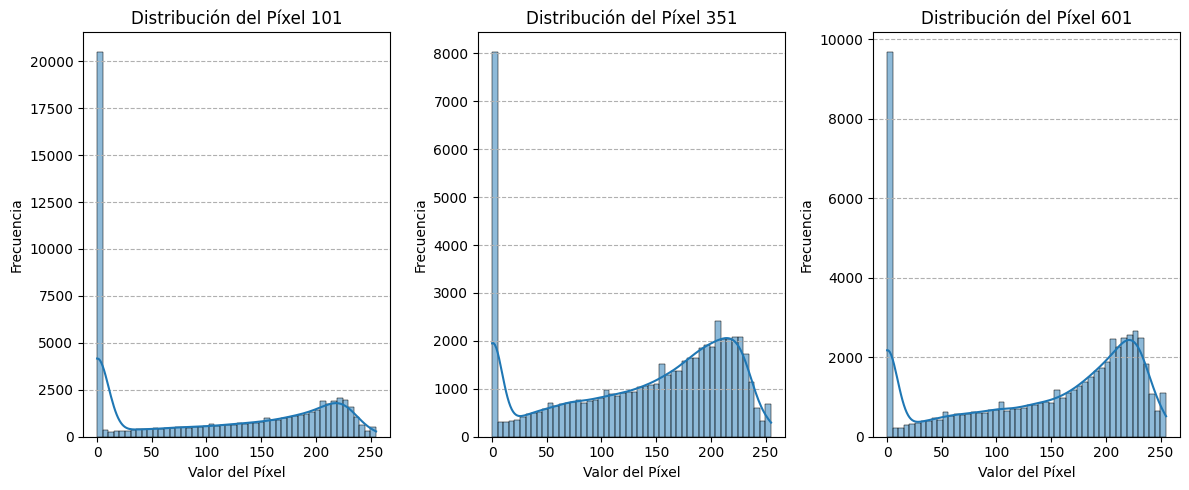

In [ ]:
# Importe de las librerias numpy, pandas y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Importar seaborn para gráficos mejorados

# --- Análisis Descriptivo de las Etiquetas de Clase (Distribución) ---
print("--- Análisis Descriptivo de las Etiquetas de Clase ---")
# Contar la frecuencia de cada clase en el conjunto de entrenamiento
class_counts = pd.Series(y_train).value_counts().sort_index()

# Mostrar la tabla de frecuencias
print("\nConteo de ejemplos por clase:")
display(class_counts)

# Visualizar la distribución de clases con un histograma
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train) # Usar countplot de seaborn para visualizar la distribución de clases
plt.title('Distribución de Clases en el Conjunto de Entrenamiento Fashion-MNIST') # Título del histograma
plt.xlabel('Etiqueta de Clase') # Etiqueta del eje X
plt.ylabel('Frecuencia') # Etiqueta del eje Y
plt.xticks(range(10), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']) # Asegurar que las etiquetas del eje X sean correctas
plt.grid(axis='y', linestyle='--') # Añadir una cuadrícula en el eje Y
plt.show() # Mostrar el histograma

# --- Análisis Descriptivo de los Valores de Píxeles ---
print("\n--- Análisis Descriptivo de los Valores de Píxeles ---")
# Aplanar los datos de entrenamiento para calcular estadísticas descriptivas de los píxeles
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Convertir los datos aplanados a un DataFrame de pandas para usar .describe()
df_pixels = pd.DataFrame(X_train_flat)

# Calcular y mostrar estadísticas descriptivas de los valores de píxeles
# Esto mostrará estadísticas como media, desviación estándar, mínimo, máximo, cuartiles para cada píxel.
# Dado que hay 784 píxeles, esta tabla será muy grande.
print("\nEstadísticas descriptivas para los valores de píxeles (mostrando un subconjunto para brevedad):")
# Mostramos las estadísticas para los primeros 10 píxeles como ejemplo
display(df_pixels.iloc[:, :10].describe())

# También podemos ver las estadísticas descriptivas para las etiquetas de clase
print("\nEstadísticas descriptivas para las etiquetas de clase:")
display(pd.Series(y_train).describe())

# Visualizar la distribución general de los valores de píxeles con un histograma
# Seleccionar un subconjunto de píxeles para visualizar sus distribuciones (por ejemplo, algunos píxeles representativos)
pixels_to_histogram = [100, 350, 600] # Índices de píxeles para los histogramas

plt.figure(figsize=(12, 5)) # Ajustar el tamaño de la figura

for i, pixel_index in enumerate(pixels_to_histogram):
    plt.subplot(1, len(pixels_to_histogram), i + 1) # Crear subgráficos
    # Crear un histograma para el píxel seleccionado
    sns.histplot(df_pixels[pixel_index], bins=50, kde=True) # Usar histplot de seaborn con KDE
    plt.title(f'Distribución del Píxel {pixel_index+1}') # Título del histograma
    plt.xlabel('Valor del Píxel') # Etiqueta del eje X
    plt.ylabel('Frecuencia') # Etiqueta del eje Y
    plt.grid(axis='y', linestyle='--') # Añadir una cuadrícula

plt.tight_layout() # Ajustar diseño para evitar solapamientos
plt.show() # Mostrar los histogramas

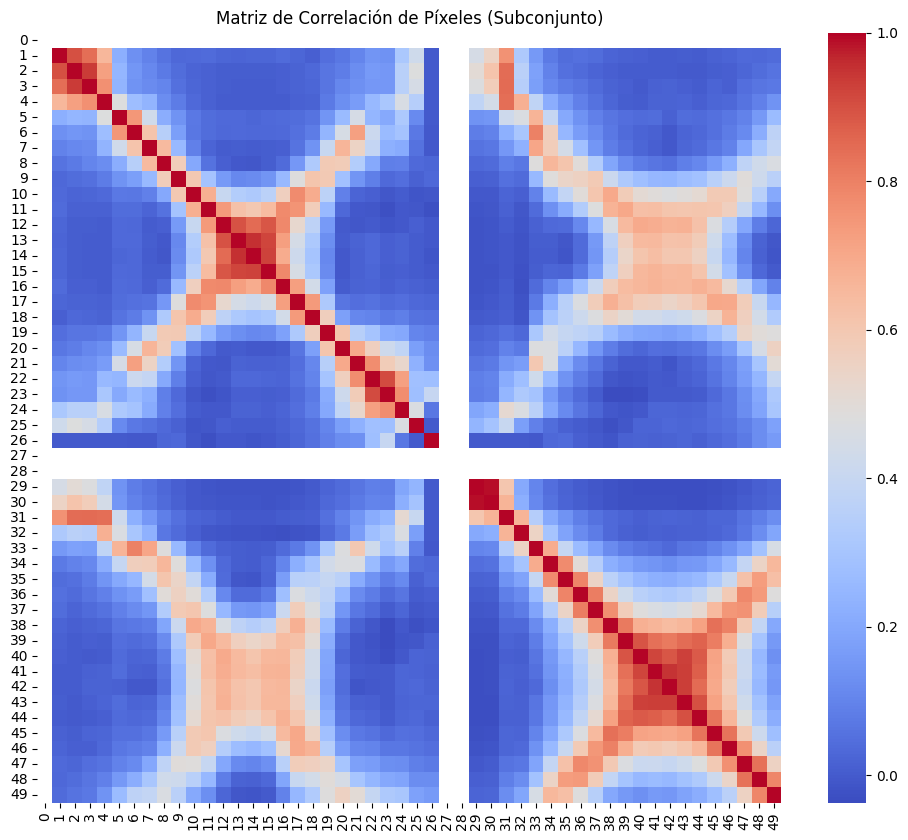

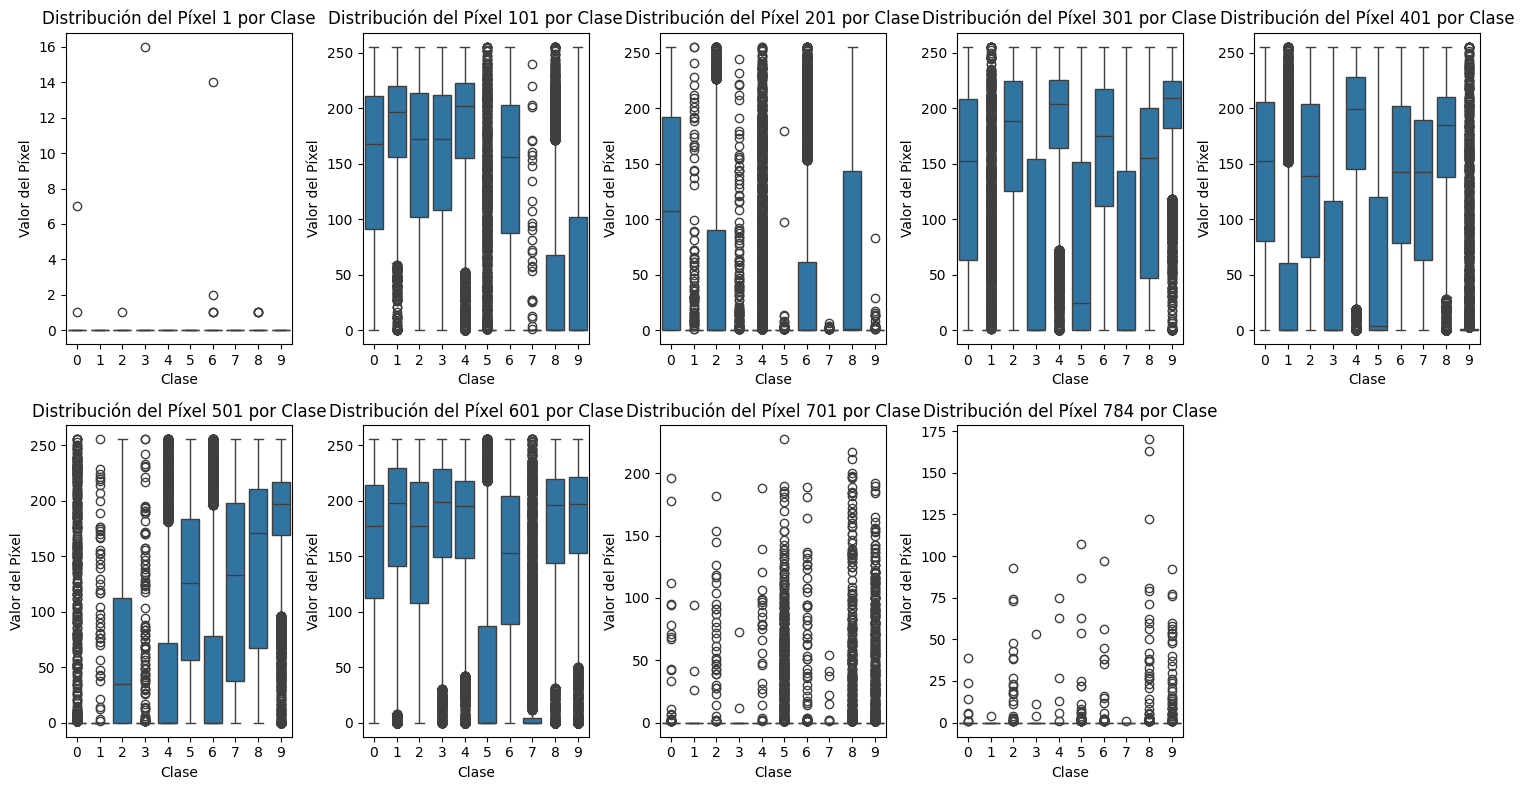

In [ ]:
import seaborn as sns # Importar la librería seaborn para visualizaciones estadísticas

# --- Matriz de Correlación ---
# Aplanar los datos de entrenamiento a 2D para el cálculo de la matriz de correlación
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Crear un DataFrame a partir de los datos de entrenamiento aplanados
# Tomando un pequeño subconjunto para fines de demostración debido a la gran cantidad de características (píxeles)
# Una matriz de correlación completa de 784x784 píxeles sería demasiado grande para visualizar de manera efectiva.
subset_size_corr = 1000 # Define el tamaño del subconjunto para la matriz de correlación
X_train_subset_corr = X_train_flat[:subset_size_corr, :] # Selecciona un subconjunto de filas

# Convertir el subconjunto a un DataFrame
df_train_subset_corr = pd.DataFrame(X_train_subset_corr)

# Calcular la matriz de correlación (enfocándose en un pequeño subconjunto de características si es necesario, por ejemplo, los primeros 50 píxeles)
num_features_to_show = 50 # Define cuántas características (píxeles) mostrar en la matriz de correlación
correlation_matrix = df_train_subset_corr.iloc[:, :num_features_to_show].corr() # Calcula la correlación para las primeras 'num_features_to_show' columnas

# Graficar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 10)) # Define el tamaño de la figura
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # Crea el mapa de calor. cmap define el esquema de color, annot=False evita mostrar los valores en cada celda.
plt.title('Matriz de Correlación de Píxeles (Subconjunto)') # Establece el título del gráfico
plt.show() # Muestra el gráfico

# Convertir los datos de entrenamiento aplanados completos y las etiquetas en un DataFrame para facilitar el gráfico con seaborn
df_train_full = pd.DataFrame(X_train_flat) # Crea un DataFrame con los datos aplanados
df_train_full['label'] = y_train # Añade la columna de etiquetas

# Seleccionar algunos píxeles para visualizar su distribución a través de diferentes clases usando boxplots
pixels_to_boxplot = [0, 100, 200, 300, 400, 500, 600, 700, 783] # Índices de píxeles para los boxplots (corresponden a las columnas en el DataFrame aplanado)

plt.figure(figsize=(15, 8)) # Define el tamaño de la figura
# Iterar a través de los píxeles seleccionados y crear un boxplot para cada uno
for i, pixel_index in enumerate(pixels_to_boxplot):
    plt.subplot(2, 5, i + 1) # Crea subgráficos en una cuadrícula de 2x5
    # Crea un boxplot mostrando la distribución de los valores del píxel actual ('pixel_index') para cada 'label' (clase)
    sns.boxplot(x='label', y=pixel_index, data=df_train_full)
    plt.title(f'Distribución del Píxel {pixel_index+1} por Clase') # Establece el título del subgráfico (se suma 1 para que coincida con la nomenclatura pixel1, pixel2, etc.)
    plt.xlabel('Clase') # Establece la etiqueta del eje x
    plt.ylabel('Valor del Píxel') # Establece la etiqueta del eje y

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que los subgráficos encajen en el área de la figura
plt.show() # Muestra el gráfico

# Descripción de lo encontrado en el EDA

El conjunto Fashion-MNIST contiene 60,000 imágenes de entrenamiento y 10,000 de prueba, cada una de 28×28 píxeles en escala de grises, con 10 categorías de prendas
. Un análisis inicial revela 60,000 registros y 785 columnas (784 píxeles + etiqueta)
. Las etiquetas están perfectamente balanceadas (6000 imágenes por clase), sin datos faltantes o corruptos
. Esto indica un dataset balanceado. Los valores de brillo de píxel varían de 0 a 255 y se normalizan dividiendo por 255 para el modelado

•	**Estadísticos descriptivos**: Al calcular medias, medianas y cuantiles de las intensidades de píxel, se observa que la mayoría de valores son bajos (fondos oscuros con pocos píxeles brillantes) conforme los histogramas dibujados para los pixeles de muestra. Se observa una distribucción de clases tipo estándar.

•	**Correlaciones y patrones**: La matriz de correlación de píxeles muestra zonas con alta relación (en rojo), lo que indica que algunos píxeles cercanos tienden a variar juntos, reflejando patrones estructurales en las imágenes (por ejemplo, bordes o contornos de las prendas). Las áreas en azul corresponden a píxeles independientes o de fondo, con baja correlación.

Los boxplots por clase evidencian cómo ciertos píxeles presentan valores más altos o más variables según la categoría de prenda, lo que sugiere que algunos sectores de la imagen aportan mayor información discriminante al modelo. En conjunto, ambos análisis permiten confirmar que el dataset contiene patrones visuales útiles para la clasificación y que no todos los píxeles contribuyen con el mismo nivel de relevancia.

En resumen, el EDA confirma un dataset limpio y balanceado, normalizado en [0,1].

# **Modelos No supervisados**
